In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

In [37]:
data = pd.read_csv('./Resources/data_country_all.csv')

data

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Avg Happiness Rank
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,3.6
1,2016,Switzerland,Western Europe,2,7.509,1.52733,1.145240,0.863030,0.585570,0.412030,0.280830,2.694630,3.6
2,2017,Switzerland,Western Europe,4,7.494,1.56498,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716,3.6
3,2018,Switzerland,Western Europe,5,7.487,1.42000,1.549000,0.927000,0.660000,0.357000,0.256000,2.276716,3.6
4,2019,Switzerland,Western Europe,6,7.480,1.45200,1.526000,1.052000,0.572000,0.343000,0.263000,2.276716,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2019,Trinidad & Tobago,Sub-Saharan Africa,39,6.192,1.23100,1.477000,0.713000,0.489000,0.016000,0.185000,0.554633,15.4
778,2018,Northern Cyprus,Sub-Saharan Africa,58,5.835,1.22900,1.211000,0.909000,0.495000,0.154000,0.179000,0.554633,24.4
779,2019,Northern Cyprus,Sub-Saharan Africa,64,5.718,1.26300,1.252000,1.042000,0.417000,0.162000,0.191000,0.554633,24.4
780,2019,North Macedonia,Sub-Saharan Africa,84,5.274,0.98300,1.294000,0.838000,0.345000,0.034000,0.185000,0.554633,16.8


In [38]:
# Group data by average happiness score over the years
data_agg = data.groupby('Country').mean()

data_agg

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Avg Happiness Rank
Country,,,,,,,,,,,
Afghanistan,2017.0,149.4,3.51280,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730,2.110017,149.4
Albania,2017.0,106.4,4.71260,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887,1.659685,106.4
Algeria,2017.0,66.2,5.66760,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219,2.708788,66.2
Angola,2016.5,140.0,3.87225,0.798380,0.938368,0.133902,0.027433,0.071570,0.105269,1.818236,112.0
Argentina,2017.0,31.2,6.45940,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371,2.761573,31.2
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,2017.0,71.8,5.53140,1.052468,1.323264,0.683741,0.213709,0.071444,0.057186,2.306876,71.8
Vietnam,2017.0,90.8,5.15460,0.723416,1.138384,0.722700,0.577207,0.091921,0.195664,1.706097,90.8
Yemen,2017.0,146.4,3.62580,0.489313,0.865448,0.365440,0.244175,0.067045,0.096929,1.586576,146.4


The r-squared is: 0.6454995141259869


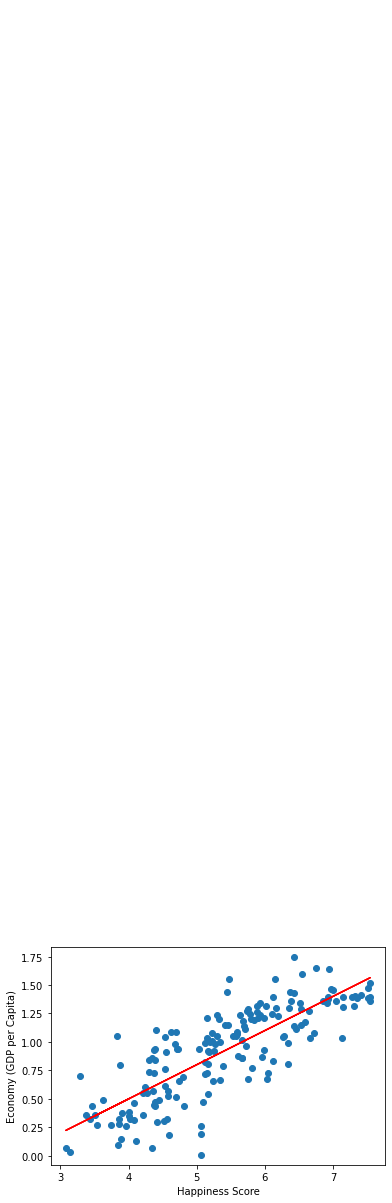

In [66]:
# Create a scatter plot with regression line for Economy GDP per Capita
x_values = data_agg['Happiness Score']
y_values = data_agg['Economy (GDP per Capita)']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.5710364796612268


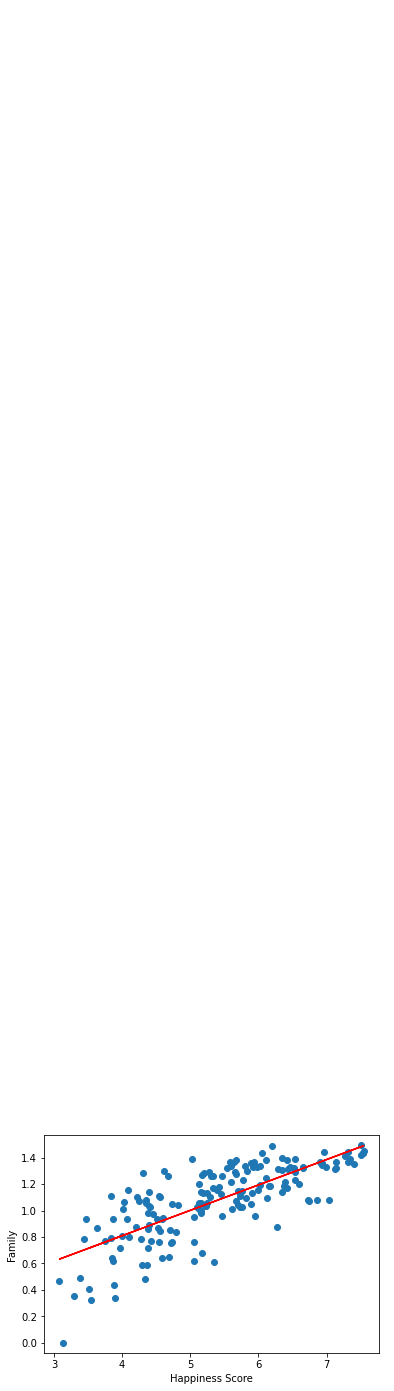

In [58]:
# Create a scatter plot with regression line for Family
x_values = data_agg['Happiness Score']
y_values = data_agg['Family']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Happiness Score')
plt.ylabel('Family')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.3469934591895994


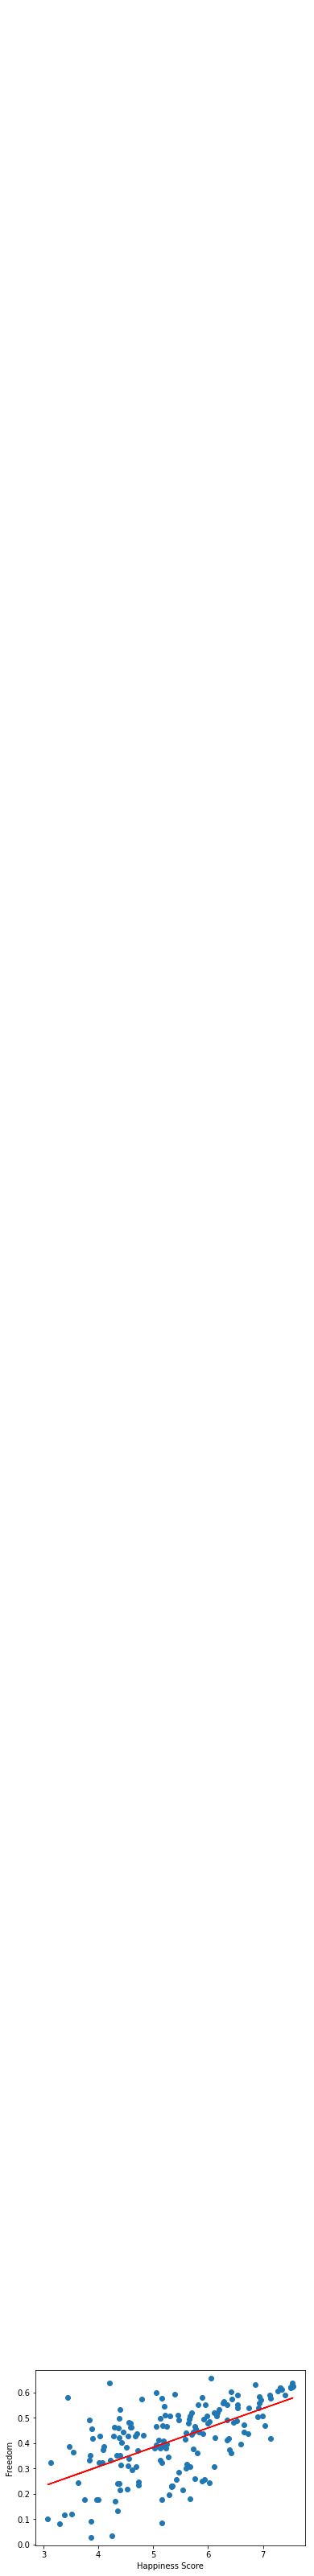

In [60]:
# Create a scatter plot with regression line for Freedom
x_values = data_agg['Happiness Score']
y_values = data_agg['Freedom']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Happiness Score')
plt.ylabel('Freedom')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.02008007324048008


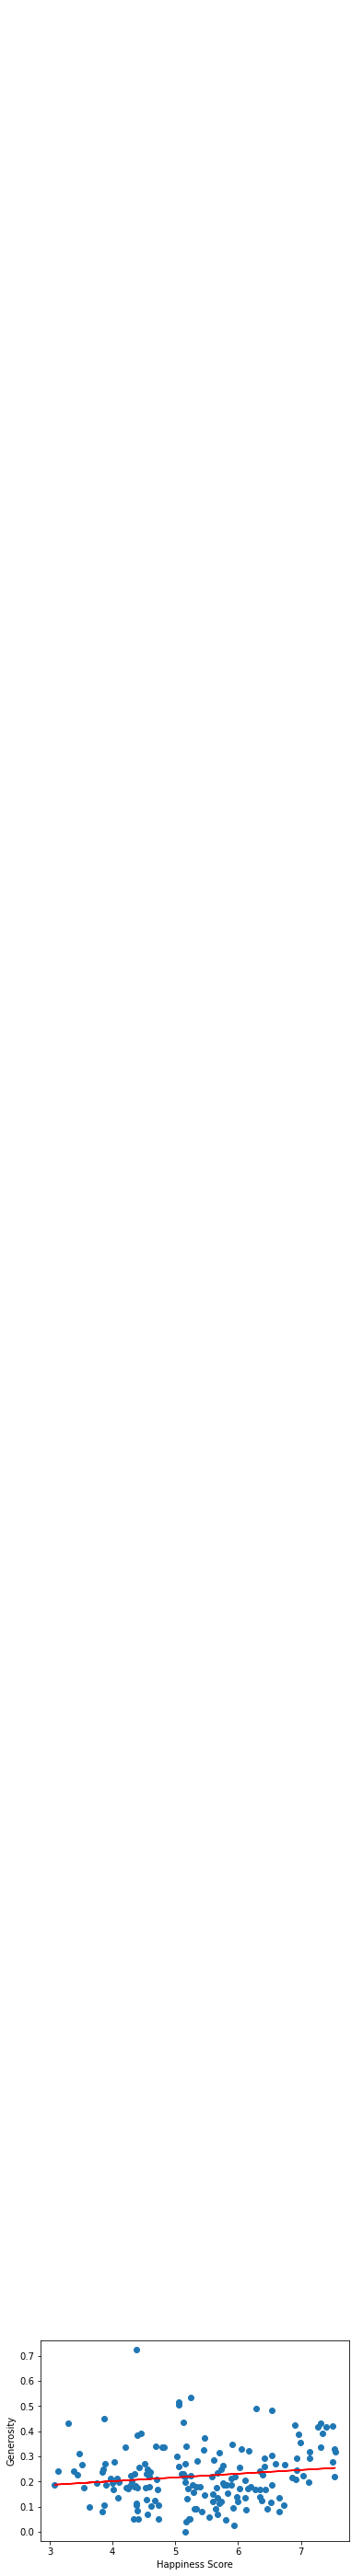

In [61]:
# Create a scatter plot with regression line for Generosity
x_values = data_agg['Happiness Score']
y_values = data_agg['Generosity']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Happiness Score')
plt.ylabel('Generosity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.5964742276715542


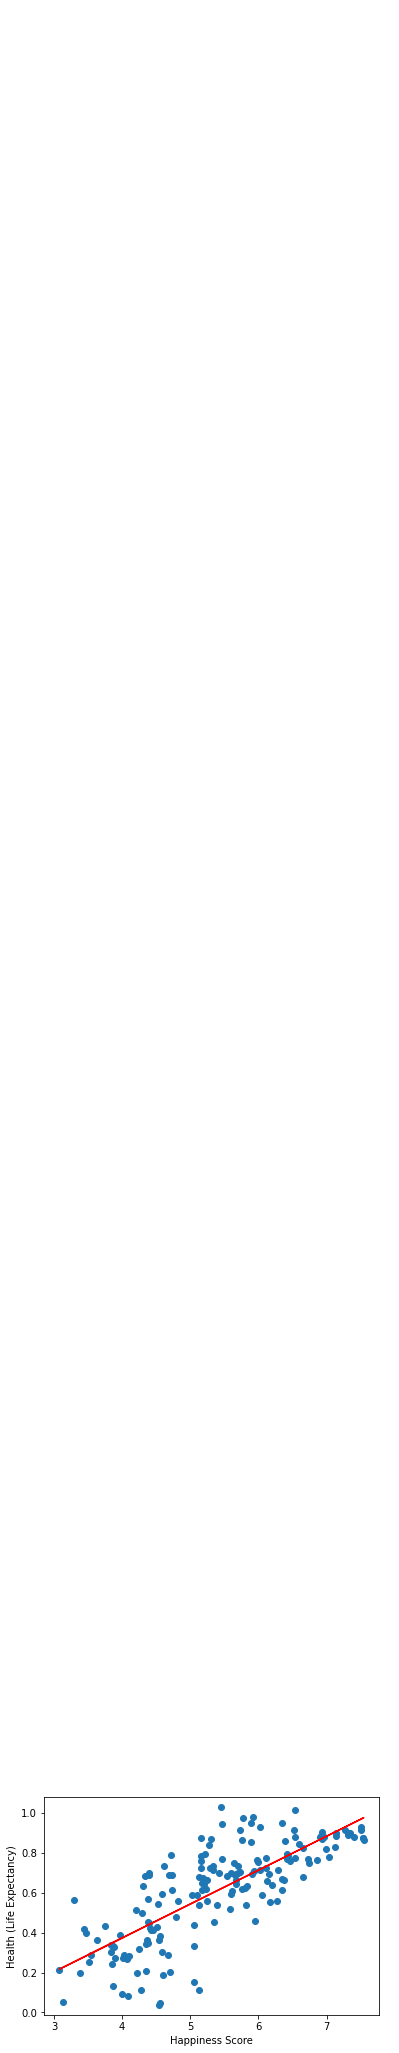

In [62]:
# Create a scatter plot with regression line for Health Life Expectancy
x_values = data_agg['Happiness Score']
y_values = data_agg['Health (Life Expectancy)']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.14219251808888625


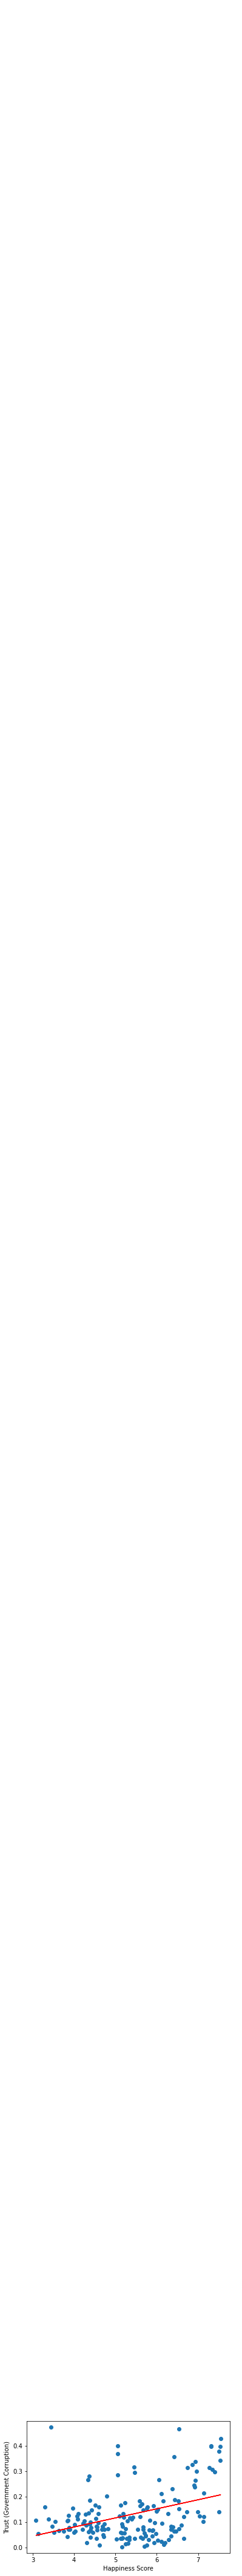

In [67]:
# Create a scatter plot with regression line for Trust Government Corruption
x_values = data_agg['Happiness Score']
y_values = data_agg['Trust (Government Corruption)']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Happiness Score')
plt.ylabel('Trust (Government Corruption)')
print(f"The r-squared is: {rvalue**2}")
plt.show()